# Data Gathering

In [70]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import pandas as pd
import io
%matplotlib inline
sns.set()


In [71]:
#read csv file
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv') 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# Programatic Data Accessing 

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [74]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Quality isuues:

*   `ScheduledDay` and	`AppointmentDay` must be formatted as timestamp  
*   invalid data in `Age` column(ex:"-1) 
*   `PatientId` is float 
*   `PatientId` contain decimal values




###### create a copy of the df

In [75]:
#create a copy of the df
df_clean = df.copy()

# Clean 

#### Define
convert `ScheduledDay` and	`AppointmentDay` columns to timestamp format


#### Code

In [76]:
df_clean['ScheduledDay']=pd.to_datetime(df_clean['ScheduledDay'])
df_clean['AppointmentDay']=pd.to_datetime(df_clean['AppointmentDay'])  

#### Test

In [77]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


#### Define
convert column `appointement id` to str

#### Code 

In [78]:
df_clean['AppointmentID'] = df_clean['AppointmentID'].astype(str)

#### Test

In [79]:
df_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Define 
clear invalid data in `age` column 


#### Code

In [80]:
#assign the zeros and the other invalid data to a var 
listt = list(df_clean[df_clean['Age'] < 0].index)

In [81]:
#drop invalid colu
df_clean.drop(listt, inplace = True)

#### Test 

In [82]:
df_clean[df_clean['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


#### Define 
remove the dot decimal and change the type of patient id to str  

#### Code 

In [83]:
df_clean['PatientId'] = df_clean['PatientId'].astype(str)

In [84]:
df_clean['PatientId']=df_clean['PatientId'].replace('.', '')

In [85]:
df_clean['PatientId']=df_clean['PatientId'].astype(float)

In [86]:
df_clean['PatientId']=df_clean['PatientId'].astype(int)

In [87]:
df_clean['PatientId']=df_clean['PatientId'].astype(str)

In [88]:
df_clean.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824300,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694000,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299950,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448180,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [89]:
df_clean.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Analyzing

### Questions
1.	what is the most age range not committing to their appointments ?
2.	What's the relation between having a handicap and the possibility of no show ?
3.	What are the top neighbourhoods residents committing to their appointments and the least to commit ?
4.	which is the highest date of number of appointments?
5.	what is the percentage of missing up the appointments?


In [90]:
no_show = df_clean.groupby('No-show')


In [91]:
for n, n_df in no_show:
  print(n)
  print(n_df) 

No
              PatientId AppointmentID Gender        ScheduledDay  \
0        29872499824300       5642903      F 2016-04-29 18:38:08   
1       558997776694000       5642503      M 2016-04-29 16:08:27   
2         4262962299950       5642549      F 2016-04-29 16:19:04   
3          867951213174       5642828      F 2016-04-29 17:29:31   
4         8841186448180       5642494      F 2016-04-29 16:07:23   
5        95985133231300       5626772      F 2016-04-27 08:36:51   
8        56394729950000       5638447      F 2016-04-29 08:02:16   
9        78124564369300       5629123      F 2016-04-27 12:48:25   
10      734536231958000       5630213      F 2016-04-27 14:58:11   
12      566654781423000       5634718      F 2016-04-28 11:33:51   
13      911394617216000       5636249      M 2016-04-28 14:52:07   
14       99884723334900       5633951      F 2016-04-28 10:06:24   
15          99948393975       5620206      F 2016-04-26 08:47:27   
16       84574392942800       5633121      M 

In [92]:
no_show_yes = no_show.get_group('Yes')

Text(0,0.5,'Ages')

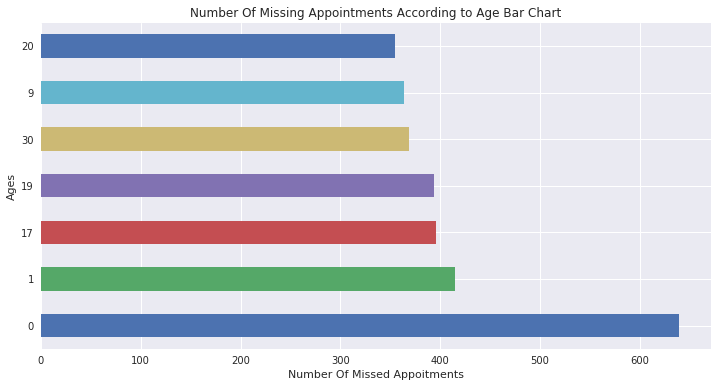

In [93]:
age_count = no_show_yes['Age'].value_counts()
age_count[0:7].plot(kind = 'barh', figsize=(12, 6))
plt.title('Number Of Missing Appointments According to Age Bar Chart')
plt.xlabel('Number Of Missed Appoitments')
plt.ylabel('Ages')

ages 0,1, 17, 19, 30, 9, 21, 20 are the most excpected to not commit to their appointment 

In [94]:
handcap_df = df.loc[:, ['Handcap', 'No-show']]
handcap_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 2 columns):
Handcap    110527 non-null int64
No-show    110527 non-null object
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [95]:
hc =handcap_df.groupby('Handcap')

In [96]:
for h, h_df in hc:
  print(h)
  print(h_df)

0
        Handcap No-show
0             0      No
1             0      No
2             0      No
3             0      No
4             0      No
5             0      No
6             0     Yes
7             0     Yes
8             0      No
9             0      No
10            0      No
11            0     Yes
12            0      No
13            0      No
14            0      No
15            0      No
16            0      No
17            0     Yes
18            0      No
19            0      No
20            0     Yes
21            0     Yes
22            0     Yes
23            0      No
24            0      No
25            0      No
26            0      No
27            0      No
28            0      No
29            0      No
...         ...     ...
110497        0      No
110498        0      No
110499        0      No
110500        0      No
110501        0      No
110502        0      No
110503        0      No
110504        0      No
110505        0      No
110506        

In [ ]:
# use apply formula to know number of people having certain number of handicap(s) 
def applyFormula(invalue):
    invalue = int(invalue)
    invalue = handcap_df[np.logical_and(handcap_df['Handcap'] == invalue, handcap_df['No-show'] == 'Yes')]
    return invalue
 
   
valueIn = input('enter number of handcaps to know the number of people having  it(type stop if when you are done)')

while valueIn != 'stop':
    valueIn = int(valueIn)
    print(applyFormula(valueIn).shape[0])
    valueIn = input('enter number of handcaps to know the number of people having  it(type stop if when you are done)')

    

In [ ]:
#plot piechart shows the percentage of people having handcap missed their appointements 
plt.figure(figsize = (8,8))
x = [no_show_yes.shape[0], having_hc_count]
labels = ["doesn't Have Handcap", "Have Handcap"]
colors=['#7CB342', '#FF6F00']
plt.pie(x, labels = labels, colors= colors, shadow='true', autopct='%1.1f%%')
plt.title("People didn't Show Up")
plt.show()

1.8% of people  missed up thier appointments have handcap



In [ ]:
nh_df = df_clean.loc[:, ['Neighbourhood', 'No-show']]
nh_df

In [ ]:
g = nh_df.groupby('No-show')

In [ ]:
nh_yes = g.get_group('Yes')

In [ ]:
nh_count = nh_yes.Neighbourhood.value_counts()

In [ ]:
nh_count[0:5].plot(kind = 'bar', figsize=(12, 6))
plt.title('Number Of Not-Missed Appointments According to Neighbourhood Bar Chart')
plt.xlabel('Number Of Not-Missed Appoitments')
plt.ylabel('Neighbourhoods')

residents of JARDIM CAMBURI, MARIA ORTIZ, ITARARÉ, RESISTÊNCIA and CENTRO are the most commiting to thier appointments 




In [ ]:
nh_count[-6:-1].plot(kind = 'bar', figsize=(12, 6))
plt.title('Number Of Missing Appointments According to Neighbourhood Bar Chart')
plt.xlabel('Number Of Missed Appoitments')
plt.ylabel('Neighbourhoods')

residents of PONTAL DE CAMBURI, ILHA DO BOI, ILHAS OCEÂNICAS DE TRINDADE, ILHA DO FRADE and AEROPORTO are the most missing thier appointments 

### which is the highest date of number of apointments? 

In [ ]:
day_count = df_clean['AppointmentDay'].value_counts()
day_count[0:5].plot(kind = 'barh', figsize=(12, 6))
plt.title('Highest Number Of Appointments In One Day Bar Chart')
plt.xlabel('Number Of Appoitments')
plt.ylabel('Appointment Days')


6/6/2016 has the greatest number of appointments

In [ ]:
no_show_yes_count = no_show_yes.shape[0]
df_rows = df_clean.shape[0]

In [ ]:
plt.figure(figsize = (8,8))
x = [no_show_yes_count, df_rows]
labels = ["People Didn't Show Up", "People Did Show up"]
colors=['#7CB342', '#FF6F00']
plt.pie(x, labels = labels, colors= colors, shadow='true', autopct='%1.1f%%')
plt.title("People didn't Show Up")
plt.show()

16.8% of people didn't show up in thier apponitmnets 

# Conclusions
#### Analysis of this Dataset came out with vert intersting and useful information, As showen in the charts we found that : 
#### 1. Ages below 21 are the most excpected to miss up their appointment and Babies (below one year) are the most to miss up.
#### 2. 1.8% of people missed up thier appointments have handcap.
#### 3. residents of JARDIM CAMBURI, MARIA ORTIZ, ITARARÉ, RESISTÊNCIA and CENTRO are the most commiting to thier appointments and residents of PONTAL DE CAMBURI, ILHA DO BOI, ILHAS OCEÂNICAS DE TRINDADE, ILHA DO FRADE and AEROPORTO are the most missing thier appointments. 
#### 4. greatest number of appointments in one day was on june 6, 2016.
#### 5. 16.8% of people didn't show up in thier apponitmnets.
# Limtations: 
This analysis of this dataset the contain different information of people recorded to have appointments in certain dates and whether they showed up or not, this might not be completely error free but i tried my best to keep most of the rows and drop the invalid rows in the narrow limits, this analysis also might not discuss all the reasons that make people miss their appointments, may be extra information will make the conclusions more accurate like knowing the degree of streets crowdedness.
